In [1]:
import pyflct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import h5py

In [3]:
f1 = h5py.File("SVGd3r13bvCcp1p_rhd280_46770s.h5", "r")
f2 = h5py.File("SVGd3r13bvCcp1p_rhd280_46800s.h5", "r")

In [4]:
T1 = f1['T']
T1 = np.asarray(T1)
T1 = T1.transpose(1, 2, 0)

T2 = f2['T']
T2 = np.asarray(T2)
T2 = T2.transpose(1, 2, 0)

image1 = T1[:,:,50]
image2 = T2[:,:,50] 

i_start = 10
i_end = 100
j_start = 10
j_end = 100

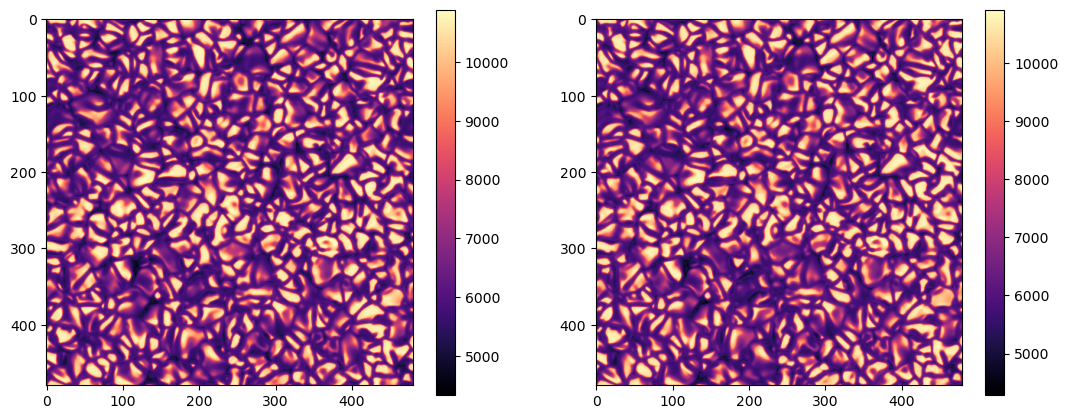

In [5]:
plt.figure(figsize=[13,5])
plt.subplot(121)
plt.imshow(T1[:,:,50], cmap = 'magma')
plt.colorbar()
plt.subplot(122)
plt.imshow(T2[:,:,50], cmap = 'magma')
plt.colorbar()

image1 = T1[:,:,50]
image2 = T2[:,:,50] # novo

In [6]:
vel_x, vel_y, vm = pyflct.flct(image1, image2, 1*30, 1*80, 4.0) # sigma promenjeno

flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.397964

flct: finished


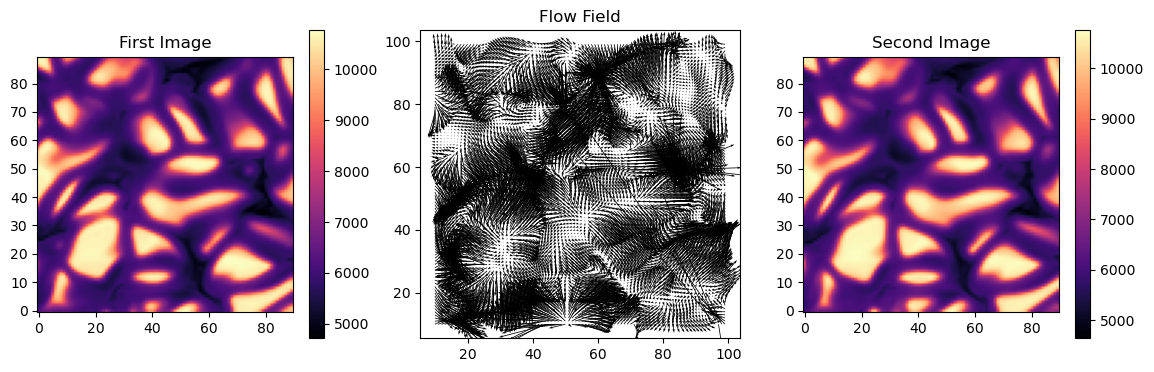

In [7]:
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()

In [5]:
vx_1 = f1['vx']
vx_1 = np.asarray(vx_1)
vx_1 = vx_1.transpose(1, 2, 0)

vy_1 = f1['vy']
vy_1 = np.asarray(vy_1)
vy_1 = vy_1.transpose(1, 2, 0)

vx_2 = f2['vx']
vx_2 = np.asarray(vx_2)
vx_2 = vx_2.transpose(1, 2, 0)

vy_2 = f2['vy']
vy_2 = np.asarray(vy_2)
vy_2 = vy_2.transpose(1, 2, 0)


vx_rel = (vx_1 + vx_2)/2/1e5
vy_rel = (vy_1 + vy_2)/2/1e5

In [5]:
from scipy.stats import pearsonr

In [7]:
r = pearsonr(vx_rel[:,:,50].flatten(), vel_x.flatten())
print(r)

NameError: name 'vel_x' is not defined

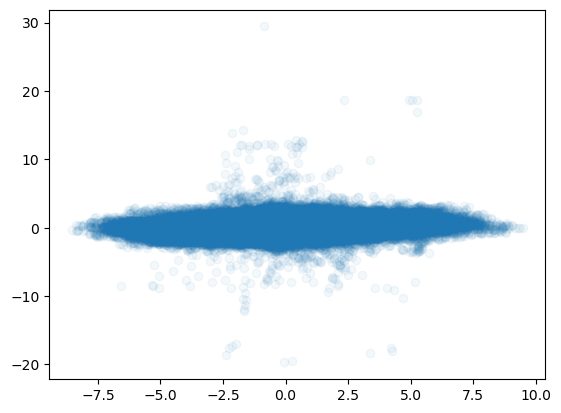

In [11]:
plt.scatter(vx_rel[:,:,50].flatten(), vel_x.flatten(), alpha = 0.05)
plt.show()

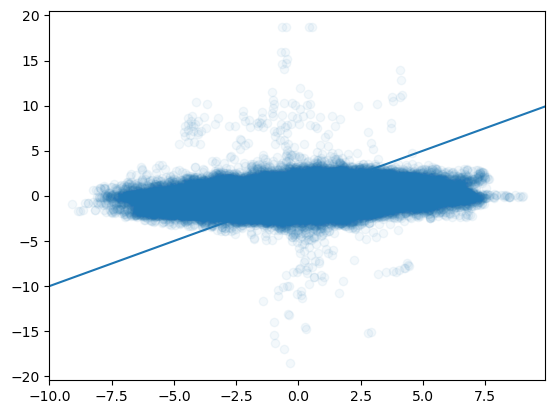

In [16]:
plt.scatter(vy_rel[:,:,50].flatten(), vel_y.flatten(), alpha = 0.05)
#plt.plot([0,1],[0,1], transform=ax.transAxes)
plt.axline((0, 0), slope=1)
plt.show()

/tmp/ipykernel_3778/4008350826.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(vy_rel[:,:,50].flatten()-vel_y.flatten(), vel_y.flatten(), s=25, cmap=plt.cm.coolwarm, zorder=10)


(-21.211417683131693, 20.528885825641154)

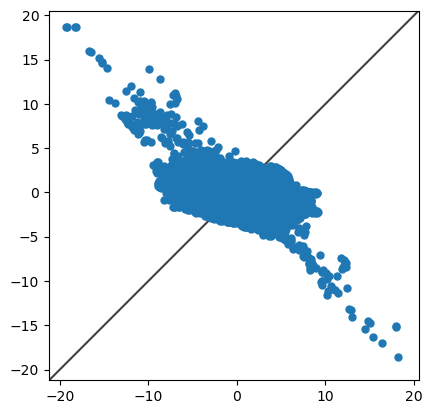

In [20]:
fig, ax = plt.subplots()
ax.scatter(vy_rel[:,:,50].flatten()-vel_y.flatten(), vel_y.flatten(), s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


<h1 style = "color:gray; font-family:Times New Roman"> Mali deo mape 9. 1. 2024.</h1>

flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.397964

flct: finished


(0.23312385265211738, 0.0)


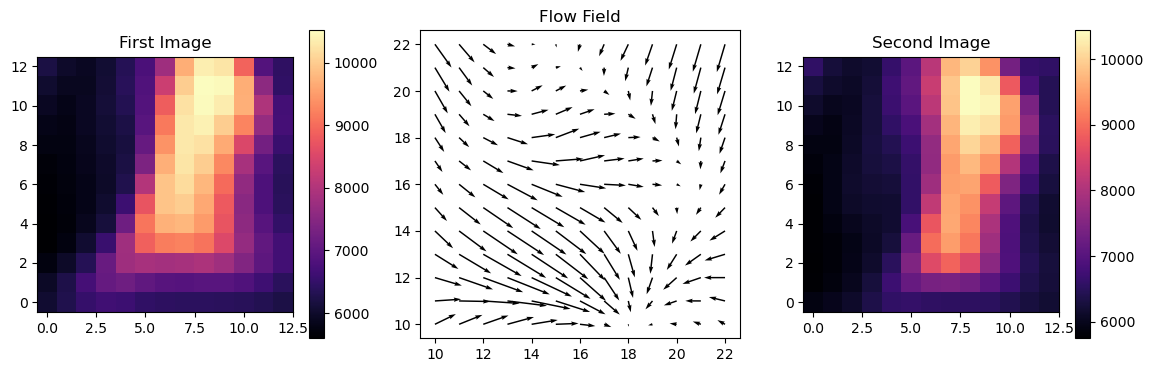

In [6]:
image3 = T1[:,:,50]
image4 = T2[:,:,50]

i_start = 10
i_end = 23
j_start = 10
j_end = 23

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 4.0) # sigma promenjeno
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()

vx_1 = f1['vx']
vx_1 = np.asarray(vx_1)
vx_1 = vx_1.transpose(1, 2, 0)

vy_1 = f1['vy']
vy_1 = np.asarray(vy_1)
vy_1 = vy_1.transpose(1, 2, 0)

vx_2 = f2['vx']
vx_2 = np.asarray(vx_2)
vx_2 = vx_2.transpose(1, 2, 0)

vy_2 = f2['vy']
vy_2 = np.asarray(vy_2)
vy_2 = vy_2.transpose(1, 2, 0)



vx_rel = (vx_1 + vx_2)/2/1e5
vy_rel = (vy_1 + vy_2)/2/1e5

r = pearsonr(vx_rel[:,:,50].flatten(), vel_x.flatten())
print(r)

In [19]:
np.shape(vel_x.flatten())

(230400,)

In [20]:
np.shape(vx_rel[10:23,10:23,50].flatten())

(169,)

flct: nominal sliding box size = 8
flct: mean value of gamma^2/sigma^2 = 0.213936

flct: finished


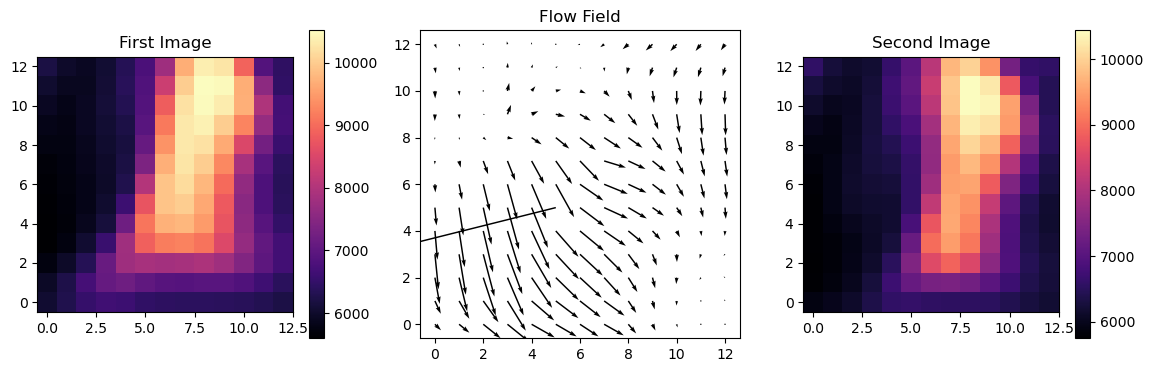

In [26]:
n1 = vx_rel[10:23, 10:23, 50]
n2 = vy_rel[10:23, 10:23, 50]
image3 = T1[10:23,10:23,50]
image4 = T2[10:23,10:23,50]
vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 4.0) # sigma promenjeno
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 13, 1)
Y = np.arange(0, 13, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3, origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U, V, \
           vel_x, vel_y, scale=20)
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4, origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()

In [28]:
np.shape(vel_x)

(13, 13)

In [29]:
r = pearsonr(n1.flatten(), vel_x.flatten())
print(r)

(-0.16356660964378777, 0.03359356133619688)


/tmp/ipykernel_4340/4182086384.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(n1.flatten(), vel_x.flatten(), s=25, cmap=plt.cm.coolwarm, zorder=10)


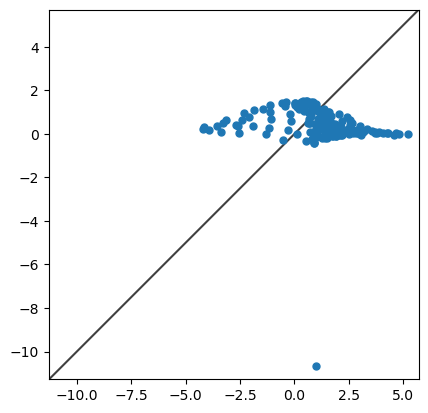

In [30]:
#plt.scatter(vx_rel[:,:,50].flatten(), vel_x.flatten(), alpha = 0.05)
fig, ax = plt.subplots()
ax.scatter(n1.flatten(), vel_x.flatten(), s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

<h1 style = "color:black; font-family:Times New Roman">Uporedjivanje brzine iz simulacije sa onom koju racuna FLCT (10. 1. 2024.)</h1>

In [7]:
image3 = T1[:,:,50]
image4 = T2[:,:,50]


vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 4.0) 


vx_1 = f1['vx']
vx_1 = np.asarray(vx_1)
vx_1 = vx_1.transpose(1, 2, 0)

vy_1 = f1['vy']
vy_1 = np.asarray(vy_1)
vy_1 = vy_1.transpose(1, 2, 0)

vx_2 = f2['vx']
vx_2 = np.asarray(vx_2)
vx_2 = vx_2.transpose(1, 2, 0)

vy_2 = f2['vy']
vy_2 = np.asarray(vy_2)
vy_2 = vy_2.transpose(1, 2, 0)



vx_rel = (vx_1 + vx_2)/2/1e5
vy_rel = (vy_1 + vy_2)/2/1e5

i_start = 10
i_end = 23
j_start = 10
j_end = 23


X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)






flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.397964

flct: finished


Text(0.5, 1.0, 'Flow Field')

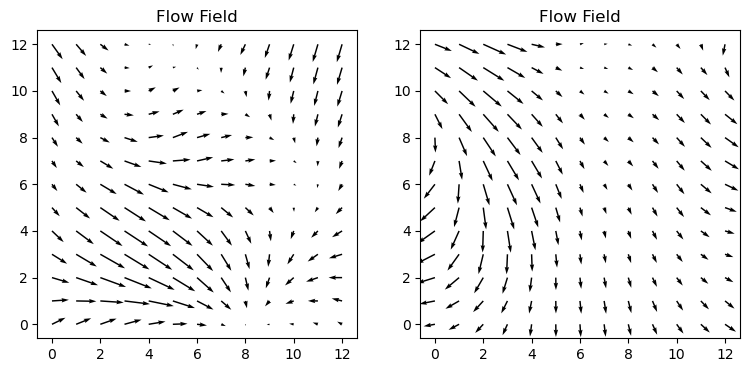

In [8]:
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field")


# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax2.set_title("Flow Field")


/tmp/ipykernel_3511/2758592568.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(vx_rel[i_start:i_end, j_start:j_end, 50], vel_x[i_start:i_end, j_start:j_end], s=25, cmap=plt.cm.coolwarm, zorder=10)


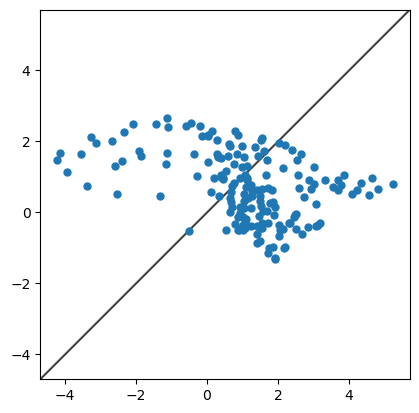

In [25]:
fig, ax = plt.subplots()
ax.scatter(vx_rel[i_start:i_end, j_start:j_end, 50], vel_x[i_start:i_end, j_start:j_end], s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

In [10]:
np.shape(vx_1)

(480, 480, 120)

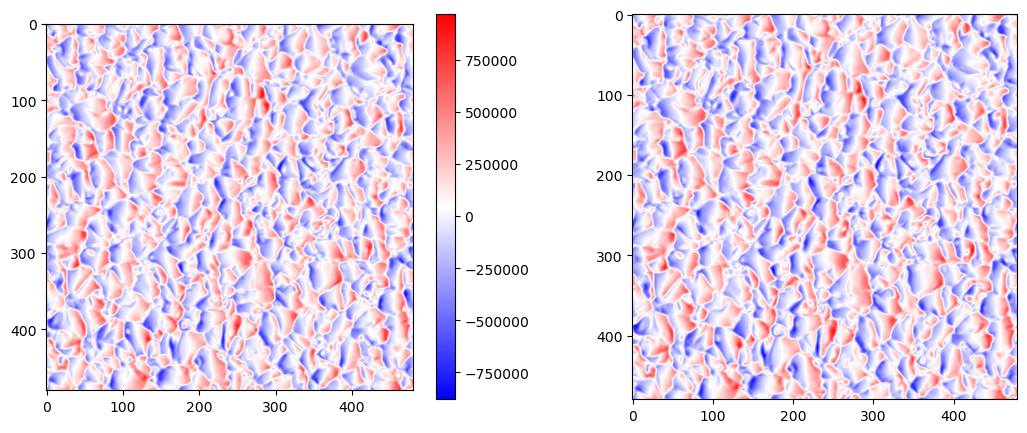

In [29]:
# Plotujemo brzine iz simulacije
# Trazimo textbook primer 

plt.figure(figsize=[13,5])
plt.subplot(121)
plt.imshow(vx_1[:,:,50], cmap = 'bwr')
plt.colorbar()
plt.subplot(122)
plt.imshow(vx_2[:,:,50], cmap = 'bwr')

<h1 style = "color:green; font-family: Times New Roman"> Granula 90_110x240_260</h1>

flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.397964

flct: finished


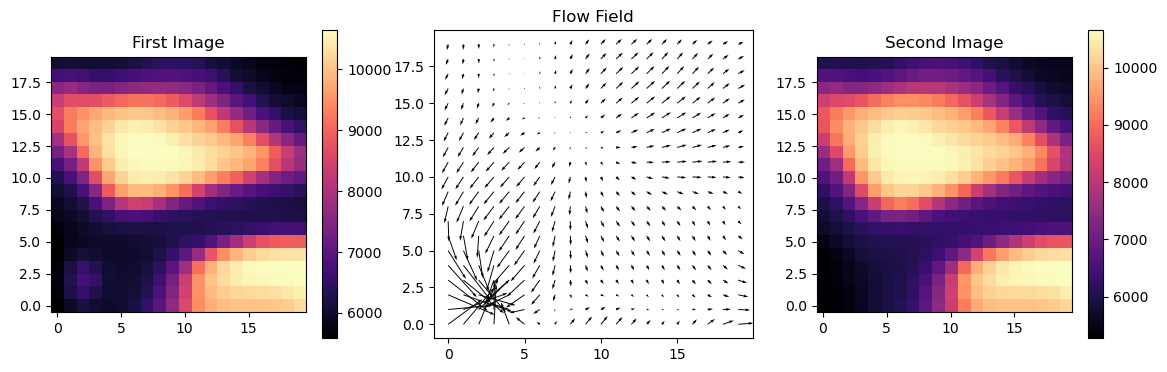

In [25]:
image3 = T1[:,:,50]
image4 = T2[:,:,50]
vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 4.0)
i_start = 90
i_end = 110
j_start = 240 # veliki brojevi dovode do greske, osim ako se U,V ne omit-uju
j_end = 260
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()


In [38]:
np.shape(vel_x)

(480, 480)

Text(0.5, 1.0, 'Flow Field')

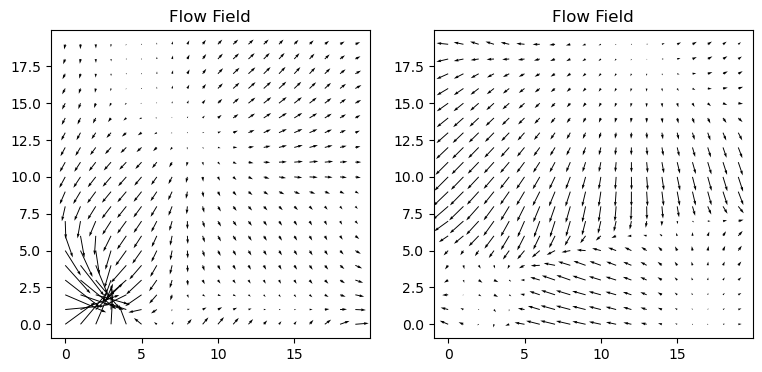

In [36]:
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field")


# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax2.set_title("Flow Field")


<h1 style = "color:maroon; font-family: Times New Roman"> Granula 20_30x20_30</h1>

In [18]:
image3 = T1[:,:,50]
image4 = T2[:,:,50]

i_start = 20
i_end = 30
j_start = 20
j_end = 30

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 4.0) # sigma promenjeno
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)


flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.397964

flct: finished


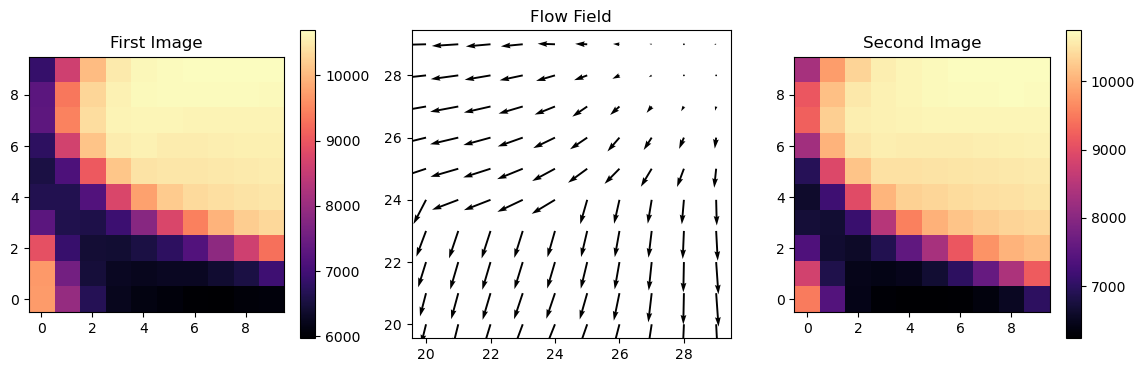

In [19]:

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()


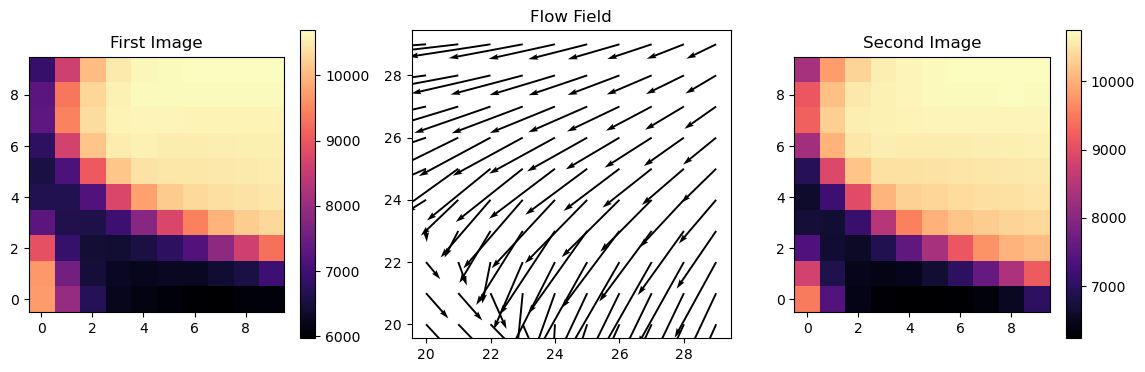

In [20]:
# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], scale=20)
ax2.set_title("Flow Field") # realna brzina

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()


<h1 style = "color:yellow; font-family: Times New Roman"> Granula 290_300x468_478</h1>

In [28]:
image3 = T1[:,:,50]
image4 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 4.0) # sigma promenjeno
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)

flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.397964

flct: finished


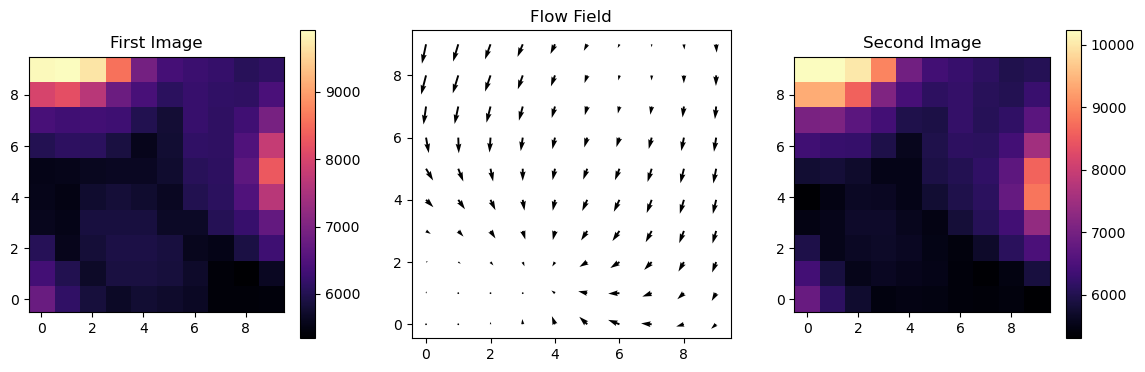

In [23]:
# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field") #FLCT

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()


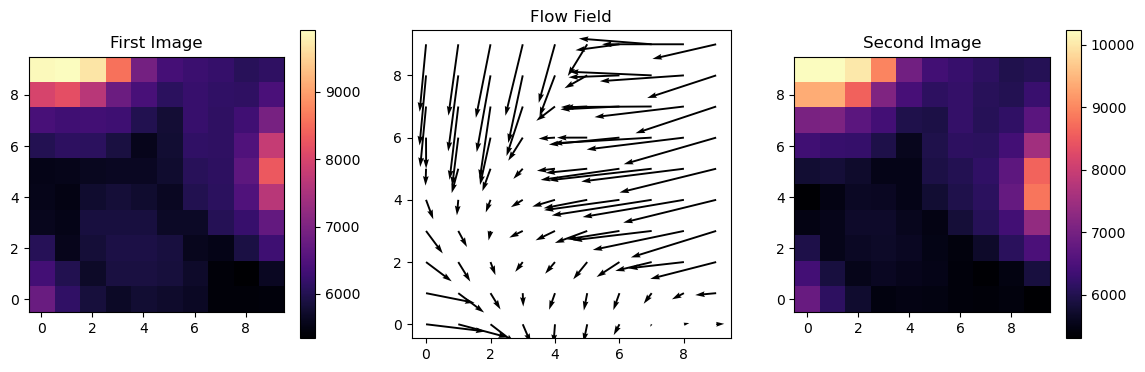

In [29]:
# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], scale=20)
ax2.set_title("Flow Field") # realna brzina

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()

<h1 style = "color:magenta; font-family: Times New Roman"> FCLT na osnovu magnetnog polja za granule</h1>

In [7]:
# Uzimamo magnetno polje po z-osi
Bz_1 = f1['bz']
Bz_1 = np.asarray(Bz_1)
Bz_1 = np.transpose(Bz_1)

Bz_2 = f2['bz']
Bz_2 = np.asarray(Bz_2)
Bz_2 = np.transpose(Bz_2)



<h1 style = "color:green; font-family: Times New Roman"> Granula 90_110x240_260</h1>

flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.305481

flct: finished


flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.397964

flct: finished


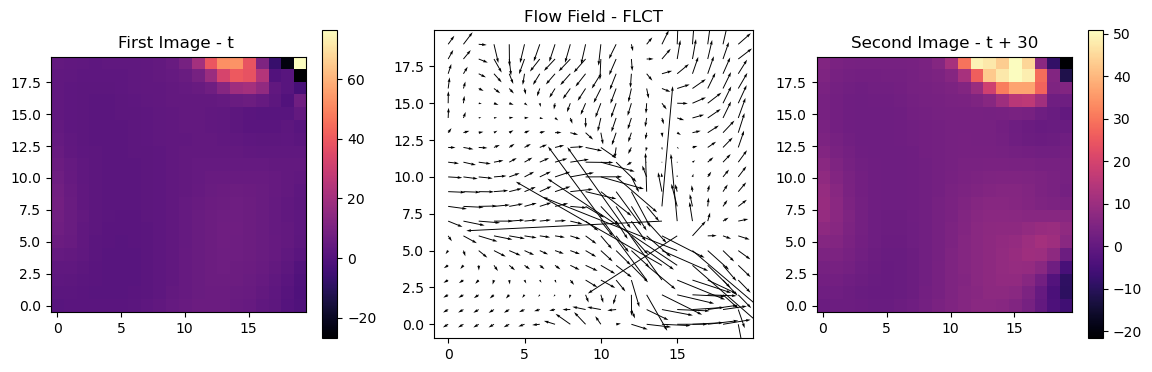

In [24]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]
image1 = T1[:,:,50]
image2 = T2[:,:,50]
vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 4.0)
i_start = 90
i_end = 110
j_start = 240 # veliki brojevi dovode do greske, osim ako se U,V ne omit-uju
j_end = 260
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

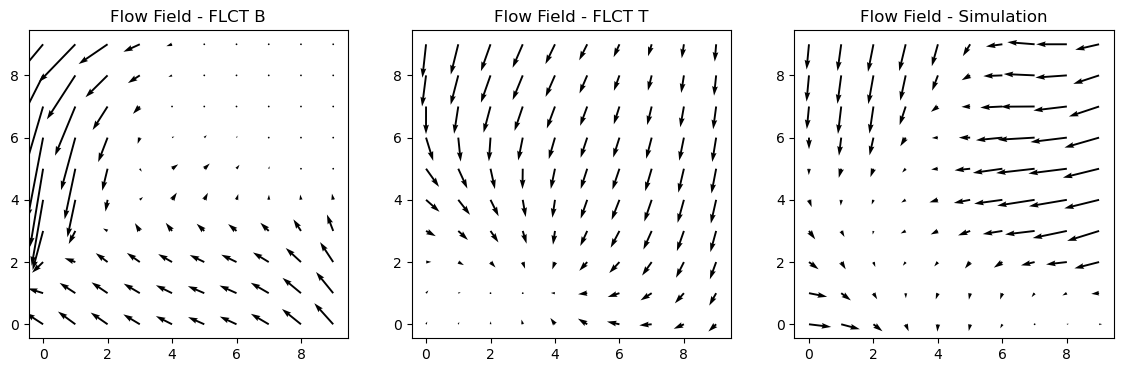

In [10]:
vx_1 = f1['vx']
vx_1 = np.asarray(vx_1)
vx_1 = vx_1.transpose(1, 2, 0)

vy_1 = f1['vy']
vy_1 = np.asarray(vy_1)
vy_1 = vy_1.transpose(1, 2, 0)

vx_2 = f2['vx']
vx_2 = np.asarray(vx_2)
vx_2 = vx_2.transpose(1, 2, 0)

vy_2 = f2['vy']
vy_2 = np.asarray(vy_2)
vy_2 = vy_2.transpose(1, 2, 0)



vx_rel = (vx_1 + vx_2)/2/1e5
vy_rel = (vy_1 + vy_2)/2/1e5

# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")


<h1 style = "color:maroon; font-family: Times New Roman"> Granula 20_30x20_30</h1>

flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.305481

flct: finished
flct: nominal sliding box size = 16


flct: mean value of gamma^2/sigma^2 = 0.397964

flct: finished


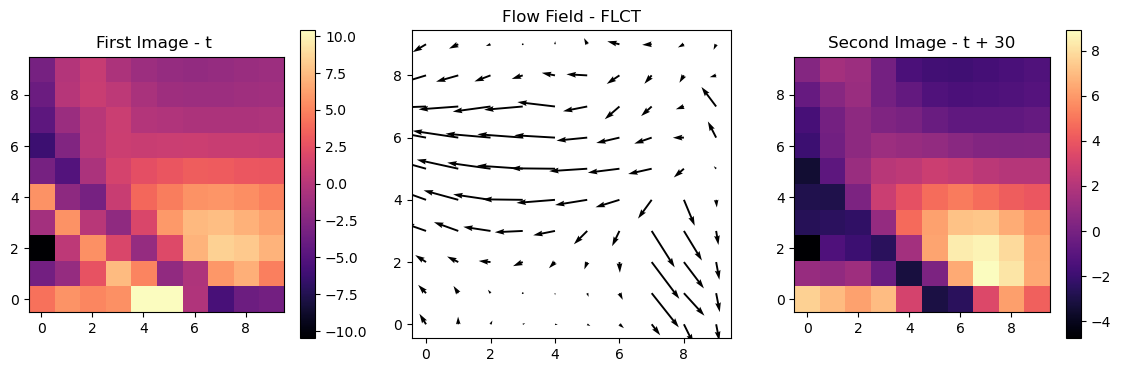

In [22]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]
image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 20
i_end = 30
j_start = 20
j_end = 30

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 4.0) # sigma promenjeno
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 4.0)
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

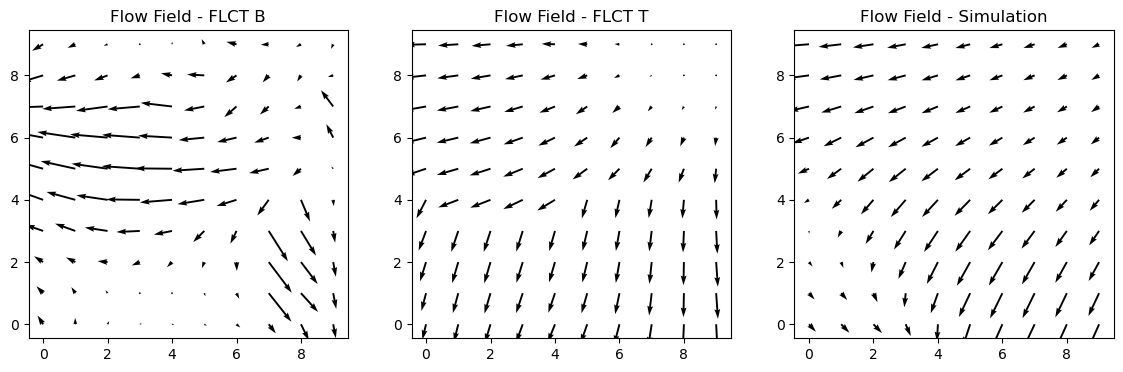

In [23]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")


<h1 style = "color:yellow; font-family: Times New Roman"> Granula 290_300x468_478</h1>

flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.305481

flct: finished


flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.397964

flct: finished


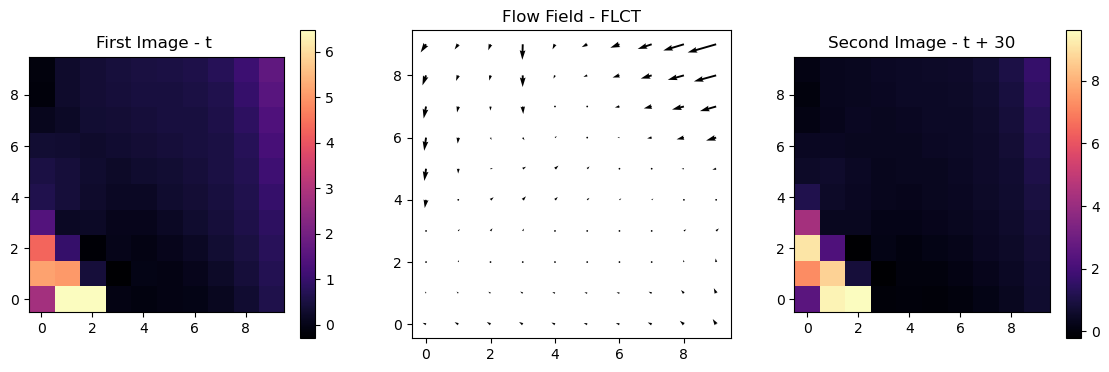

In [27]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 4.0) # sigma promenjeno
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 4.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

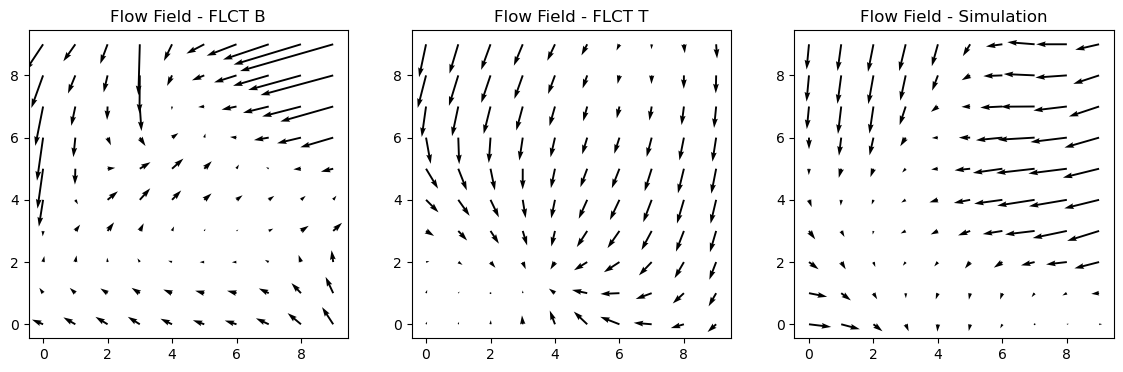

In [28]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")


<p style = "color:#ff5733; font-family:Times New Roman">Ne vidi se znacajna korelacija ni na jednom od primera.
Moze se naslutiti da postoje retki slucajevi u kojima FCLT moze ispratiti deo mape, uslovno receno,
ali u opstem slucaju se to ne moze tvrditi. Scatter plot za poslednju granulu:</p>

/tmp/ipykernel_3418/1679187914.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(vx_rel[i_start:i_end, j_start:j_end, 50], vel_x[i_start:i_end, j_start:j_end], s=25, cmap=plt.cm.coolwarm, zorder=10)


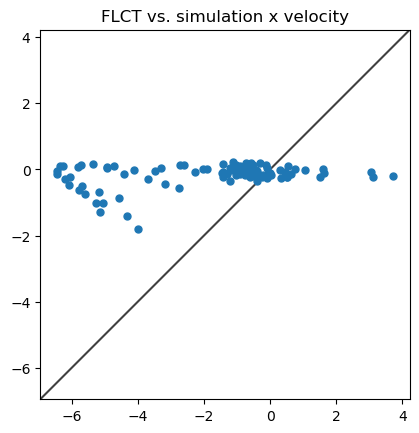

In [29]:
fig, ax = plt.subplots()
ax.scatter(vx_rel[i_start:i_end, j_start:j_end, 50], vel_x[i_start:i_end, j_start:j_end], s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("FLCT vs. simulation x velocity")
plt.show()

/tmp/ipykernel_3418/1455386854.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(vel_xT[i_start:i_end, j_start:j_end], vel_x[i_start:i_end, j_start:j_end], s=25, cmap=plt.cm.coolwarm, zorder=10)


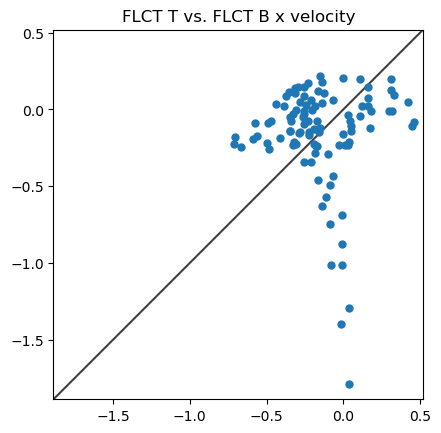

In [31]:
# FLCT T vs FCLT B
fig, ax = plt.subplots()
ax.scatter(vel_xT[i_start:i_end, j_start:j_end], vel_x[i_start:i_end, j_start:j_end], s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("FLCT T vs. FLCT B x velocity")
plt.show()

In [ ]:
# Denis je rekao da je izmedju 10 i 15 najbolji sigma, nama manji broj gotovo sigurno
# Na jednom primeru se "igrati" sa sigma parametrom i posmatrati promene

<h1 style = "color:brown; font-family:Times New Roman">Promena parametra sigma na primeru granule 290_300x468_478 (21.1.2024)</h1>

flct: nominal sliding box size = 20
flct: mean value of gamma^2/sigma^2 = 0.233342

flct: finished


flct: nominal sliding box size = 20
flct: mean value of gamma^2/sigma^2 = 0.325274

flct: finished


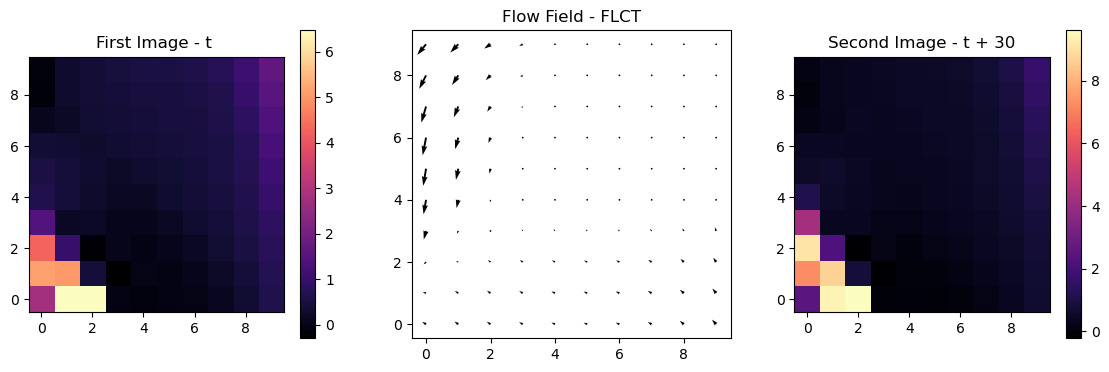

In [35]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 5.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 5.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

(0.009765393684834813, 2.765960797063615e-06)


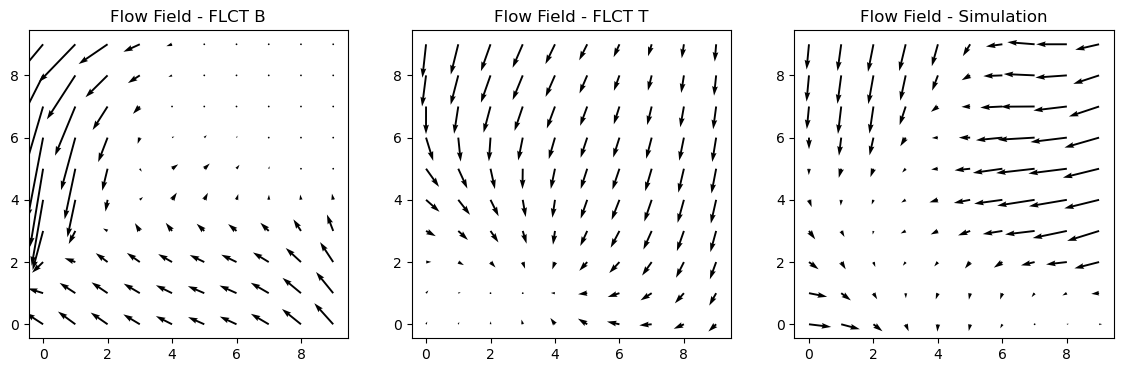

In [36]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")
r = pearsonr(vx_rel[:,:,50].flatten(), vel_x.flatten())
print(r)

flct: nominal sliding box size = 24
flct: mean value of gamma^2/sigma^2 = 0.178436

flct: finished


flct: nominal sliding box size = 24
flct: progress  i = 

flct: mean value of gamma^2/sigma^2 = 0.264744

flct: finished


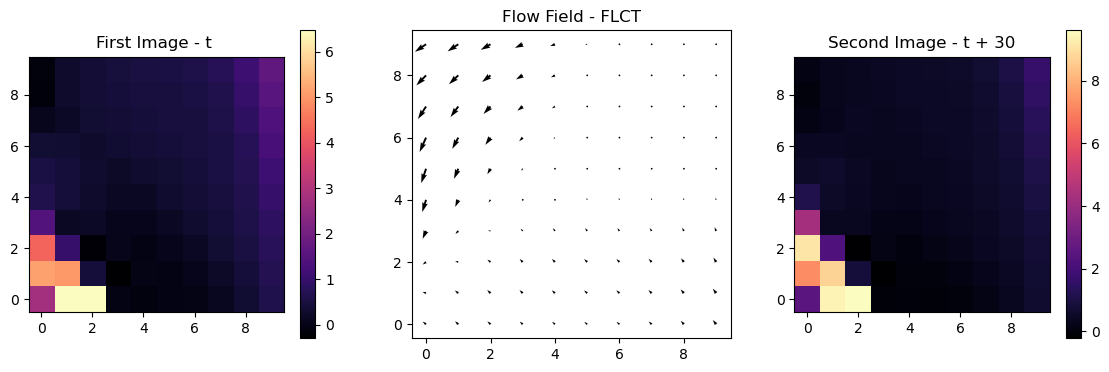

In [14]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 6.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 6.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

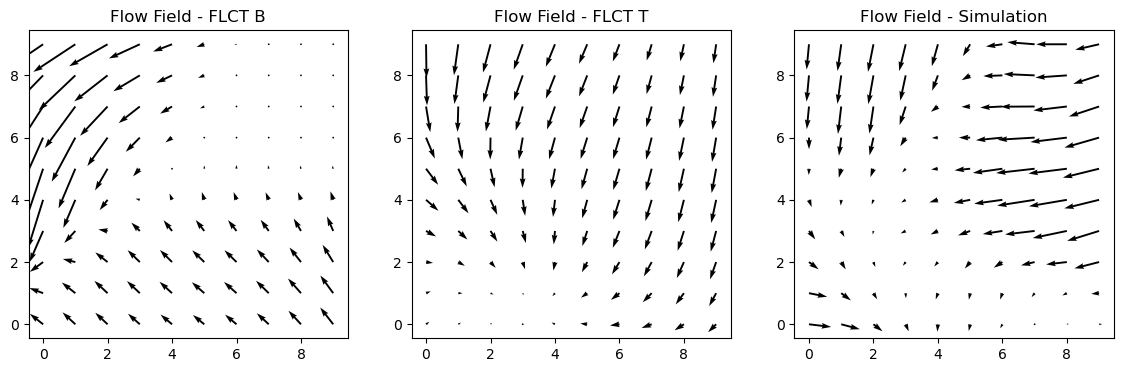

In [15]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

flct: nominal sliding box size = 28
flct: mean value of gamma^2/sigma^2 = 0.136743

flct: finished
flct: nominal sliding box size = 28


flct: mean value of gamma^2/sigma^2 = 0.215387

flct: finished


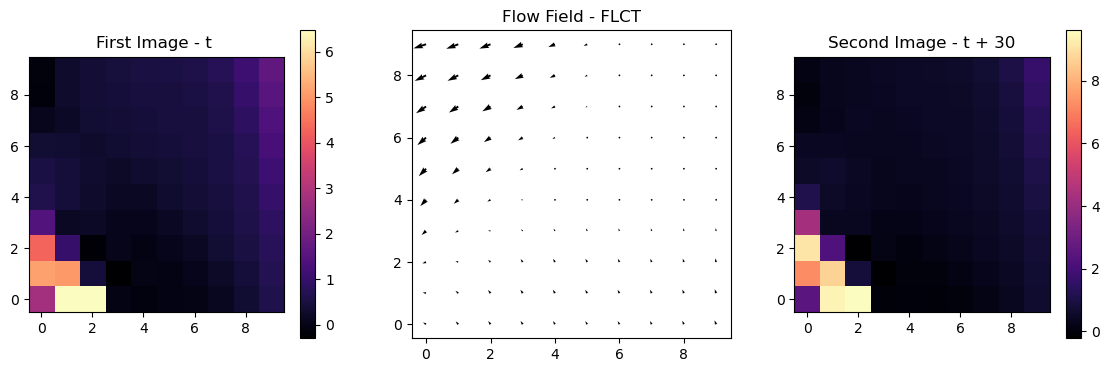

In [16]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 7.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 7.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

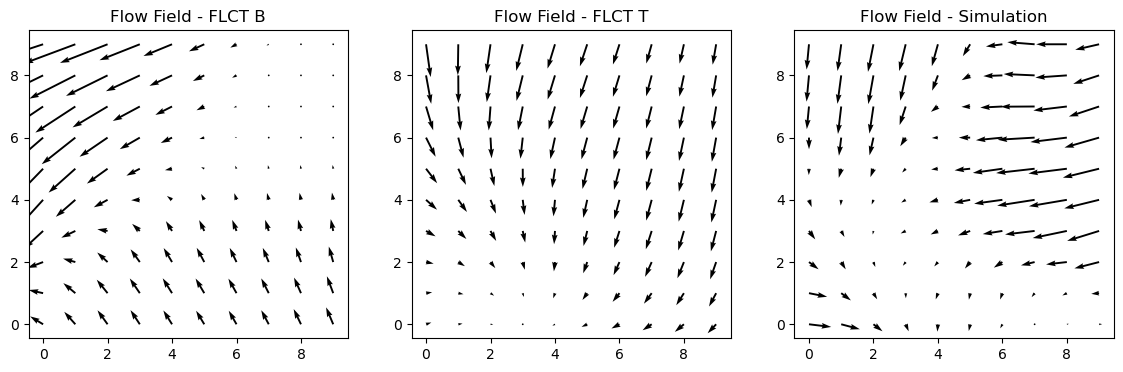

In [17]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

flct: nominal sliding box size = 32
flct: mean value of gamma^2/sigma^2 = 0.105093

flct: finished
flct: nominal sliding box size = 32


flct: mean value of gamma^2/sigma^2 = 0.17569

flct: finished


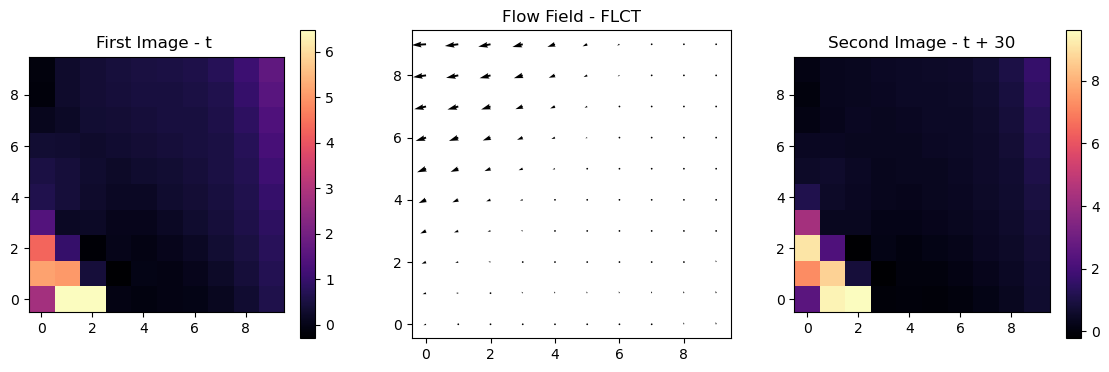

In [18]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 8.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 8.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

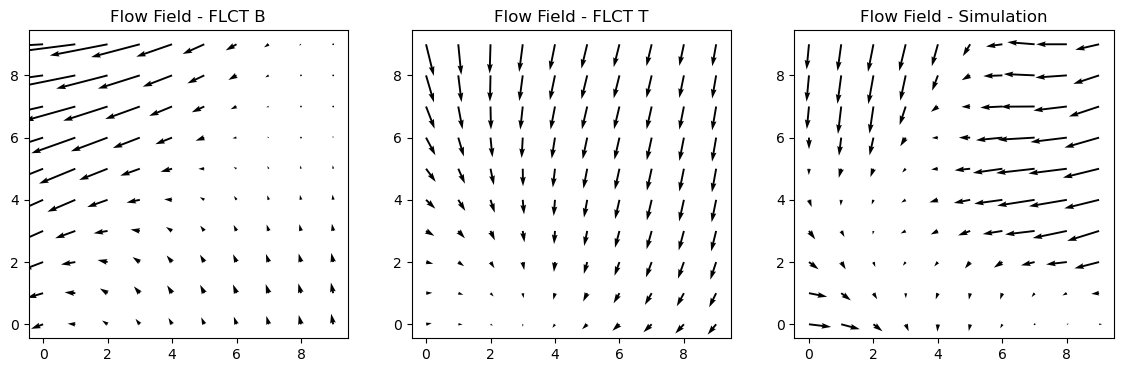

In [19]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

flct: nominal sliding box size = 36
flct: mean value of gamma^2/sigma^2 = 0.0811757

flct: finished
flct: nominal sliding box size = 36


flct: mean value of gamma^2/sigma^2 = 0.144206

flct: finished


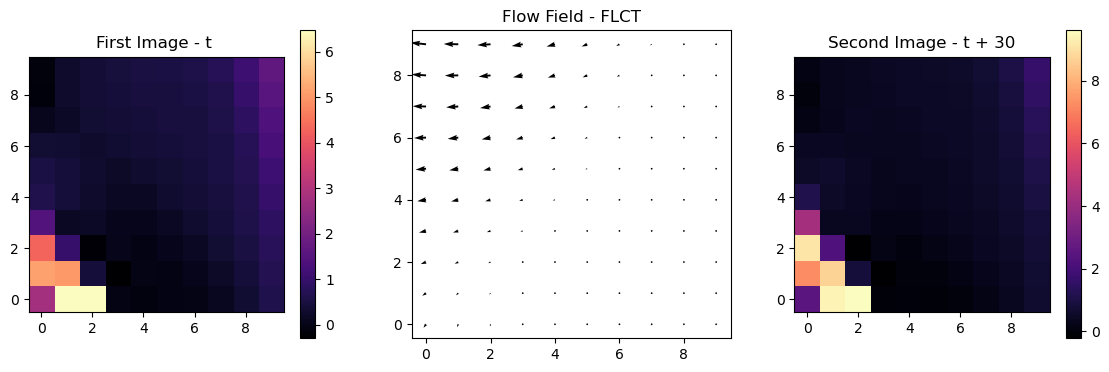

In [20]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 9.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 9.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

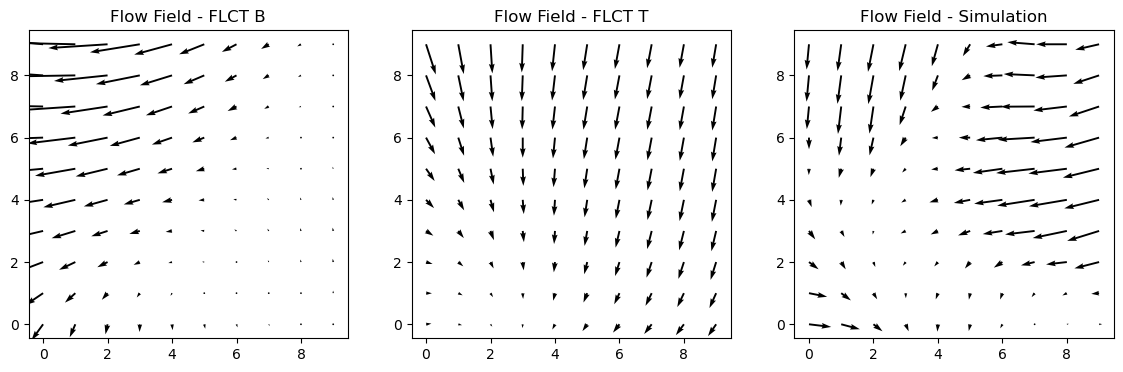

In [21]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

flct: nominal sliding box size = 40
flct: mean value of gamma^2/sigma^2 = 0.0628353

flct: finished


flct: nominal sliding box size = 40
flct: prog

flct: mean value of gamma^2/sigma^2 = 0.119393

flct: finished


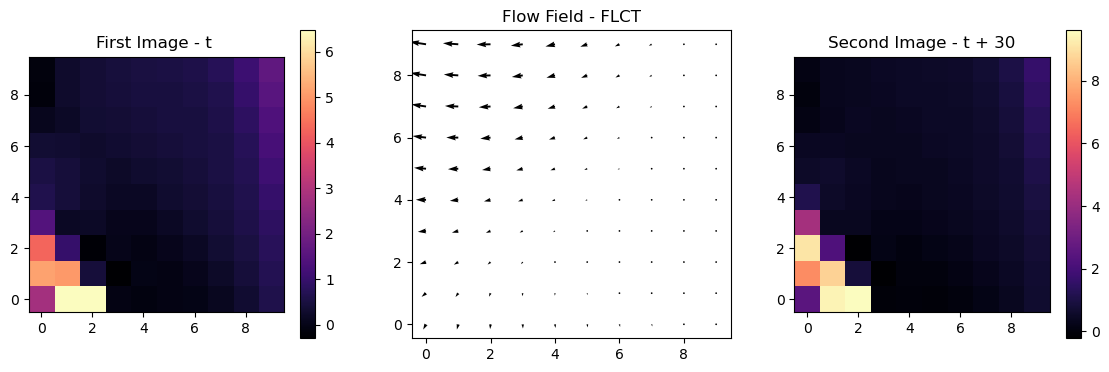

In [22]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 10.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 10.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

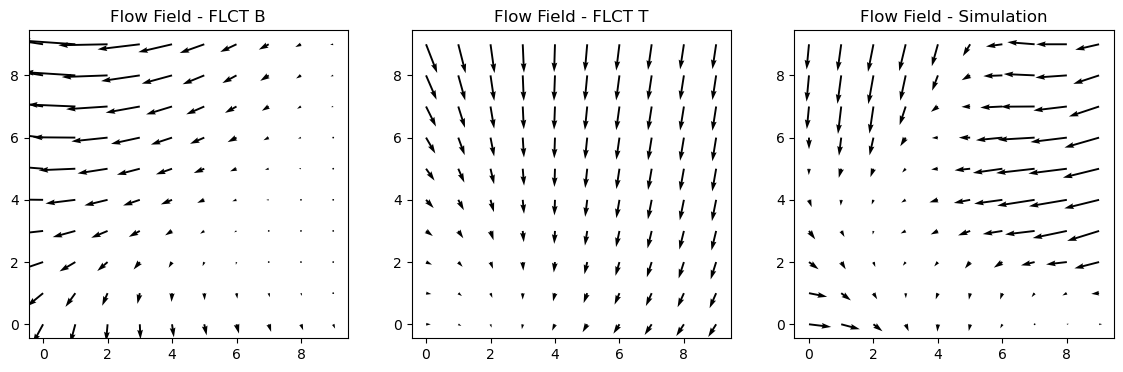

In [23]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

flct: nominal sliding box size = 44
flct: mean value of gamma^2/sigma^2 = 0.0495787

flct: finished
flct: nominal sliding box size = 44
flct: progress 

flct: mean value of gamma^2/sigma^2 = 0.0997959

flct: finished


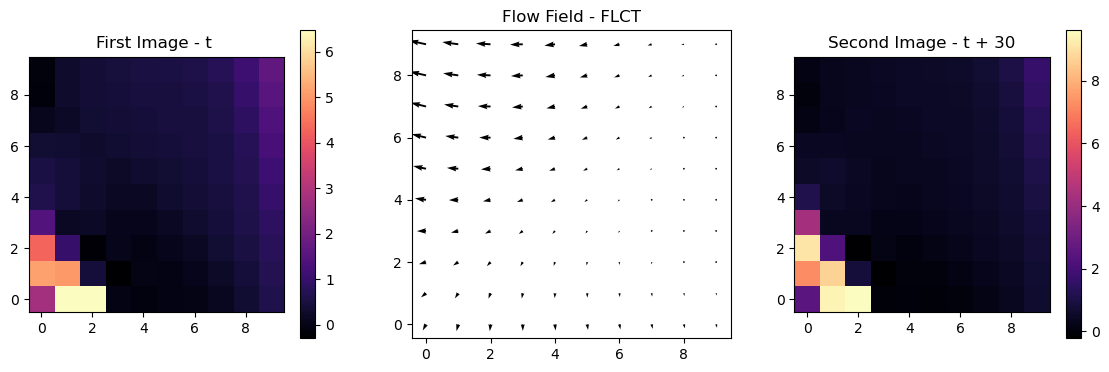

In [24]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 11.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 11.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

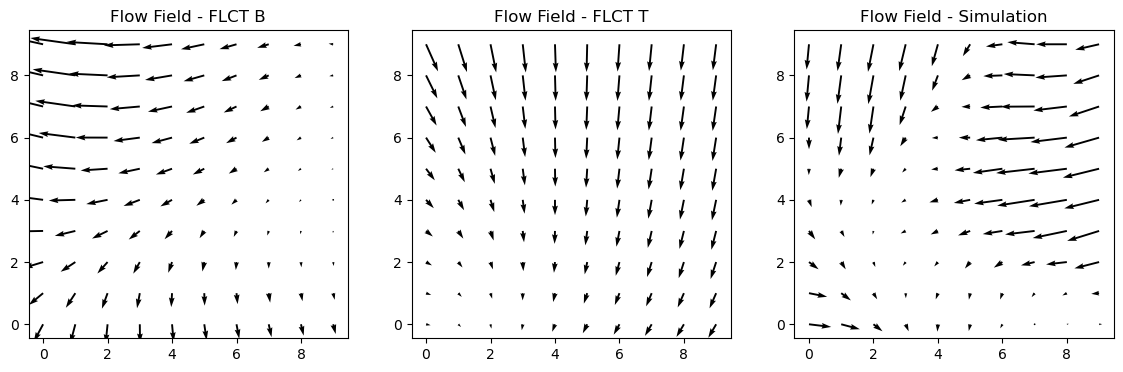

In [25]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

flct: nominal sliding box size = 48
flct: mean value of gamma^2/sigma^2 = 0.0399125

flct: finished


flct: nominal sliding box size = 48
flct: mean value of gamma^2/sigma^2 = 0.0842611

flct: finished


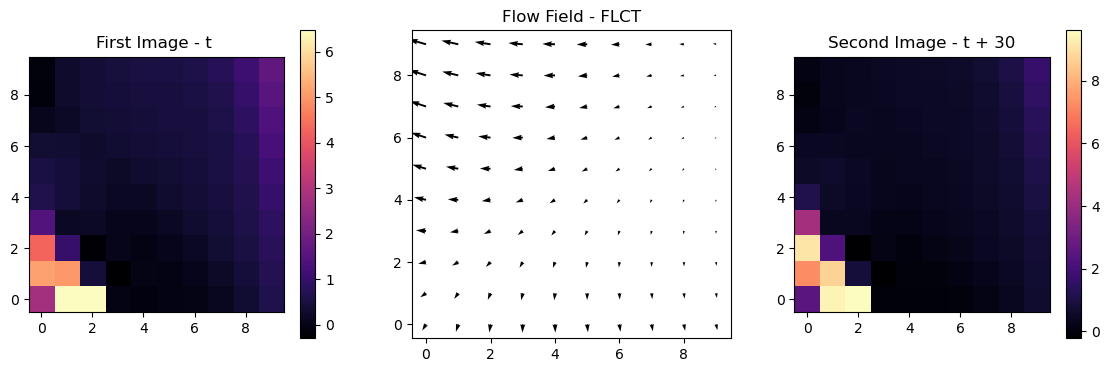

In [26]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 12.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 12.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

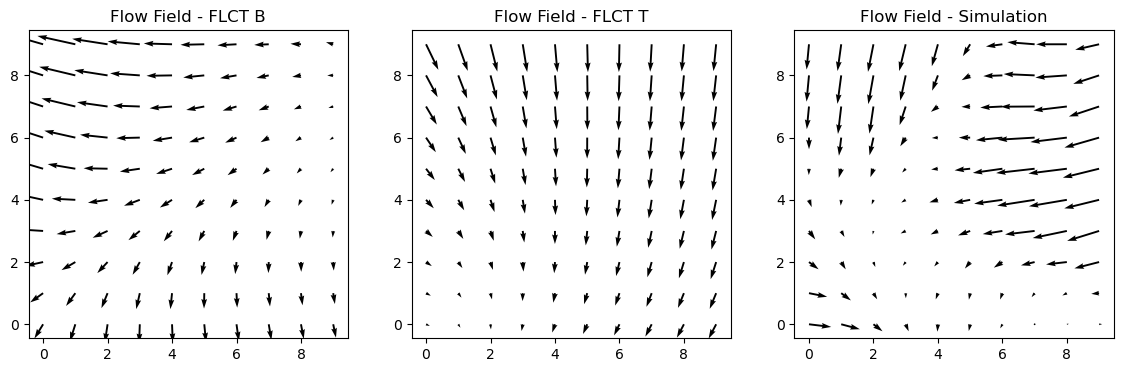

In [27]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

flct: nominal sliding box size = 52
flct: mean value of gamma^2/sigma^2 = 0.0327

flct: finished
flct: nominal sliding box size = 52


flct: mean value of gamma^2/sigma^2 = 0.0718249

flct: finished


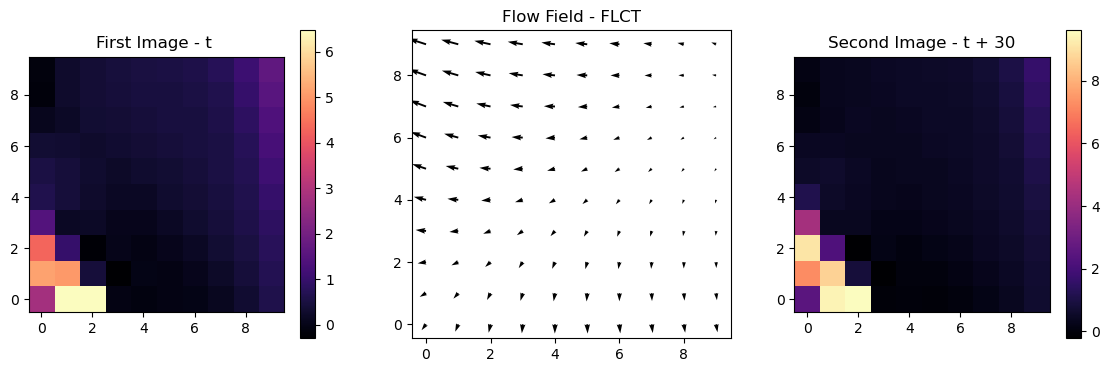

In [28]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 13.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 13.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

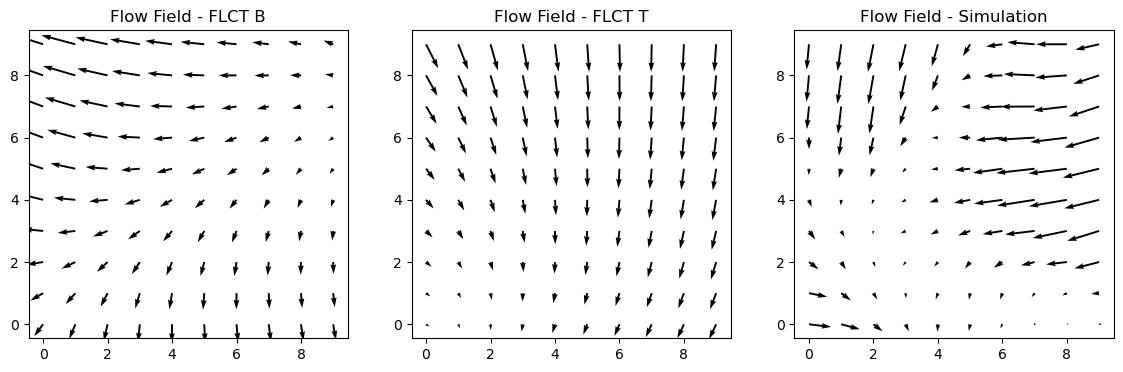

In [29]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

flct: nominal sliding box size = 60
flct: mean value of gamma^2/sigma^2 = 0.0278513

flct: finished
flct: nominal sliding box size = 60


flct: mean value of gamma^2/sigma^2 = 0.0620509

flct: finished


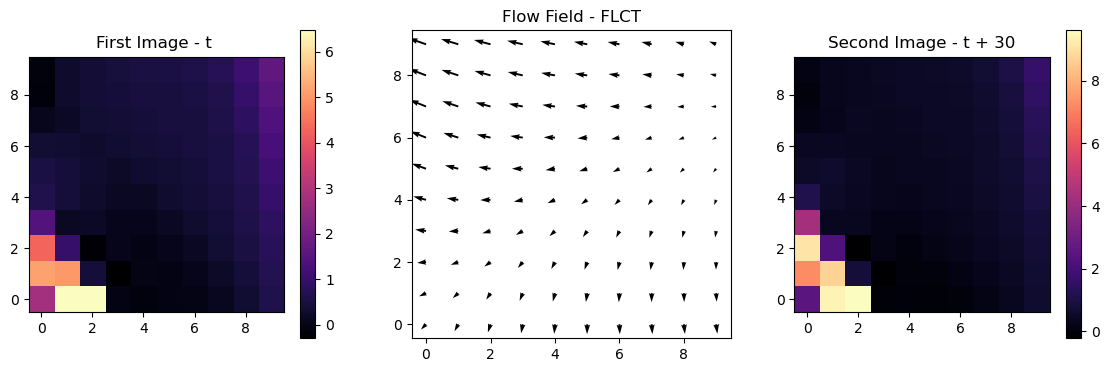

In [30]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 14.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 14.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

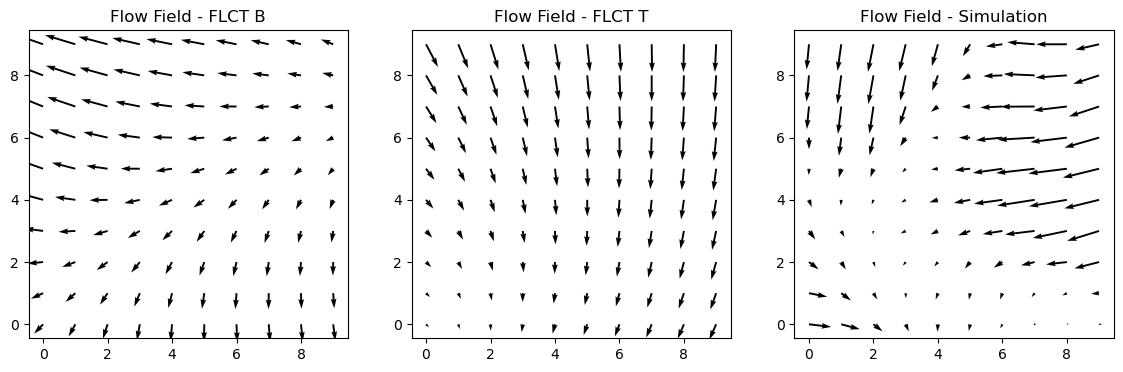

In [31]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

flct: nominal sliding box size = 64
flct: mean value of gamma^2/sigma^2 = 0.023599

flct: finished
flct: nominal sliding box size = 64


flct: mean value of gamma^2/sigma^2 = 0.0537934

flct: finished


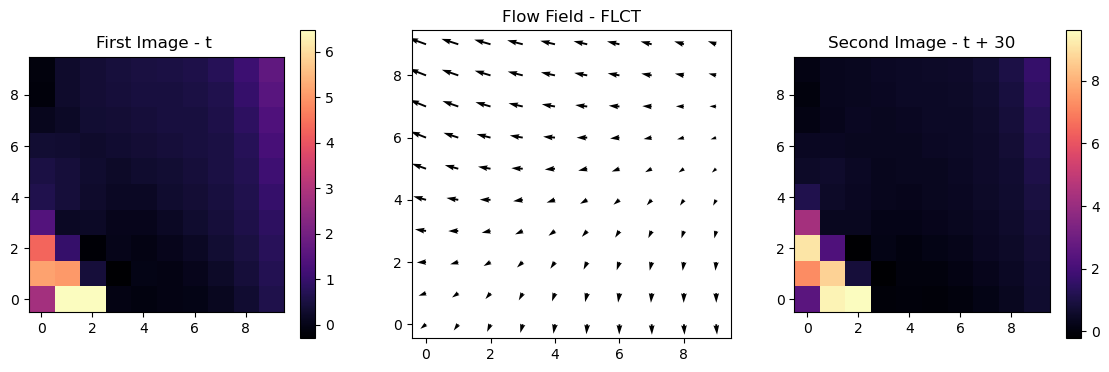

In [32]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 15.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 15.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

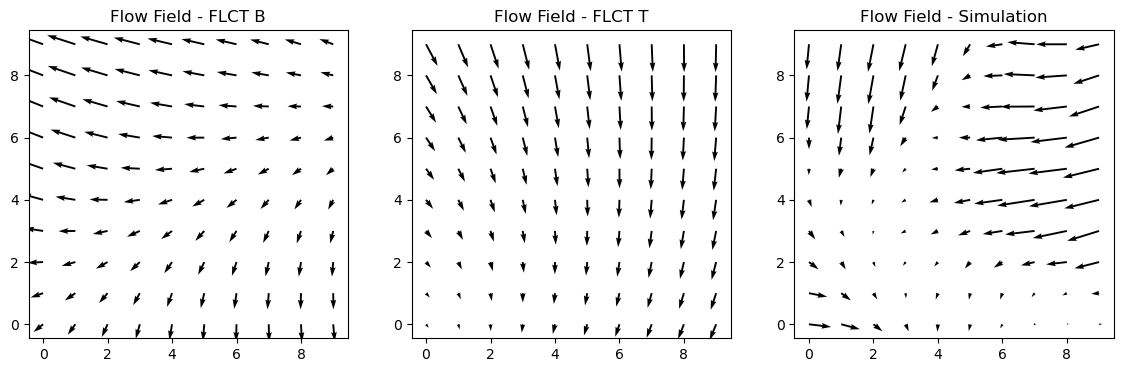

In [33]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

In [34]:
r = pearsonr(vx_rel[:,:,50].flatten(), vel_x.flatten())
print(r)

(-0.011205748359546935, 7.494277962276486e-08)


<p style = "font-family:Times New Roman">Sigma koje smo koristili u pocetku je 4.0. Kako povecavamo sigma, korelacija izmedju FLCT i simulacije postaje manja ili fluktuira oko male vrednosti tipa 0.011. Pearson-ov koeficijent koji je najveci do sada je ~ 0.23 i to za sigma = 4.0 izmedju brzine iz simulacije i brzine koju je FLCT odredio na osnovu temperature. Mozemo tvrditi da su manje vrednosti pogodnije za sigma, sto se slaze sa rezolucijom koju imamo (vece sigma odgovara vecoj rezoluciji bolje). Opet, nemamo idealno poklapanje, a ni polovicno sudeci po vrednosti r iz gornje celije. </p>

flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.305481

flct: finished


flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.397964

flct: finished


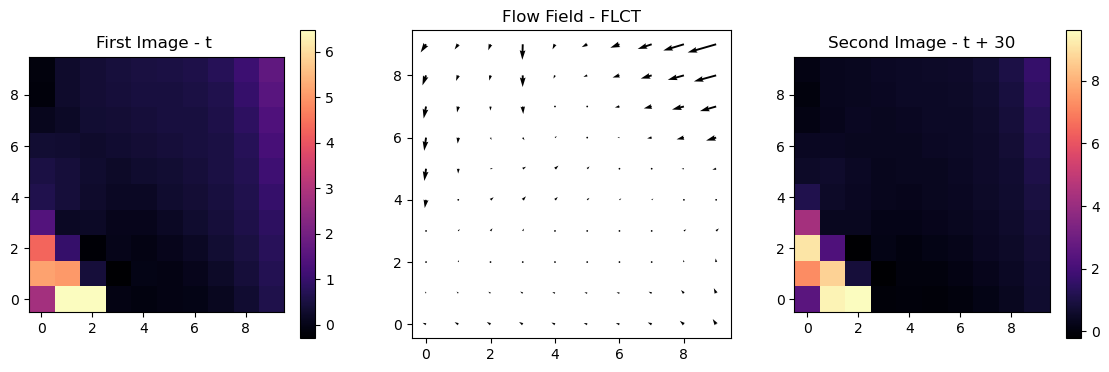

In [43]:
image3 = Bz_1[:,:,50]
image4 = Bz_2[:,:,50]

image1 = T1[:,:,50]
image2 = T2[:,:,50]

i_start = 290
i_end = 300
j_start = 468
j_end = 478

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*80, 4.0) # sigma promenjeno (originalno je 4.0)
vel_xT, vel_yT, vmT = pyflct.flct(image1, image2, 1*30, 1*80, 4.0)
# print(vel_x)
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)
 #Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - t ")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field - FLCT")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - t + 30")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field - Simulation')

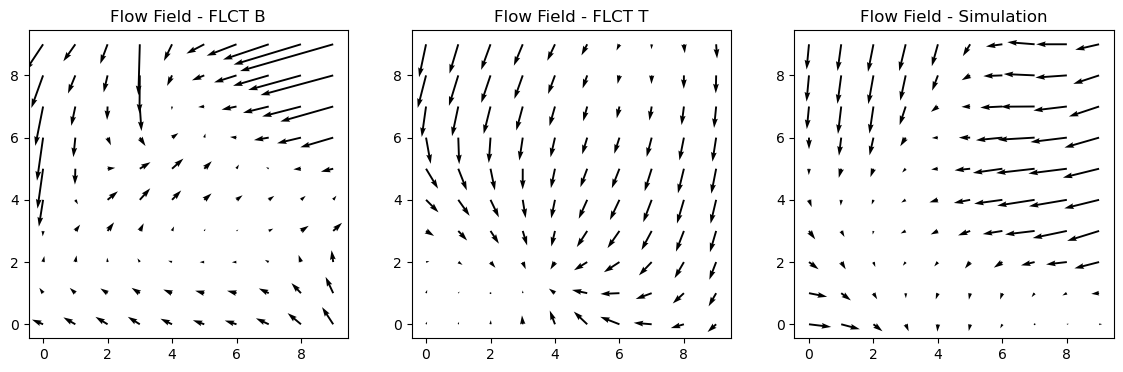

In [44]:
# Uporedjujemo dobijenu brzinu sa onom iz simulacije i plotujemo
# Plotting the first image
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.quiver(vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], 
           )
ax1.set_title("Flow Field - FLCT B")

ax2 = fig.add_subplot(132)
ax2.quiver(vel_xT[i_start:i_end, j_start:j_end], vel_yT[i_start:i_end, j_start:j_end], 
           )
ax2.set_title("Flow Field - FLCT T")


# Plot the 2D flow field
ax3 = fig.add_subplot(133)
ax3.quiver(vx_rel[i_start:i_end, j_start:j_end, 50], vy_rel[i_start:i_end, j_start:j_end, 50], \
           )
ax3.set_title("Flow Field - Simulation")

In [45]:
r = pearsonr(vx_rel[:,:,50].flatten(), vel_x.flatten())
print(r)

(0.01282593278287657, 7.429157323647601e-10)


In [ ]:
# Strelice plotovati preko polja, magnetnog za prva dva, a temperature za treci

# Novi fits fajl - korelisati, dato u mejlu